In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [10]:
award_df = pd.read_csv('base.csv')
cols_to_drop = ['seas_id', 'season', 'player_id', 'player', 'experience','dpoy', 'mip', 'nba roy', 'smoy']
x = award_df.drop(cols_to_drop, axis=1)  
y = np.log1p(award_df['nba mvp'])
# y = award_df['nba mvp']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=482)

reg_linear = LinearRegression()
reg_linear.fit(x_train, y_train)

pred = reg_linear.predict(x_test)
y_pred_linear = np.expm1(pred)
y_test_actual = np.expm1(y_test)  

mse_linear = mean_squared_error(y_test_actual, y_pred_linear)
r2 = r2_score(y_test_actual, y_pred_linear)
mae = mean_absolute_error(y_test_actual, y_pred_linear)
print(f"When using a Linear Regression Model, the MSE for MVP Award Shares is: {mse_linear:.4f}")
print(f"R-squared (R^2) for MVP Award Shares: {r2:.4f}")
print(f"Mean Absolute Error (MAE) for MVP Award Shares: {mae:.4f}")

When using a Linear Regression Model, the MSE for MVP Award Shares is: 0.0000
R-squared (R^2) for MVP Award Shares: 0.9933
Mean Absolute Error (MAE) for MVP Award Shares: 0.0010


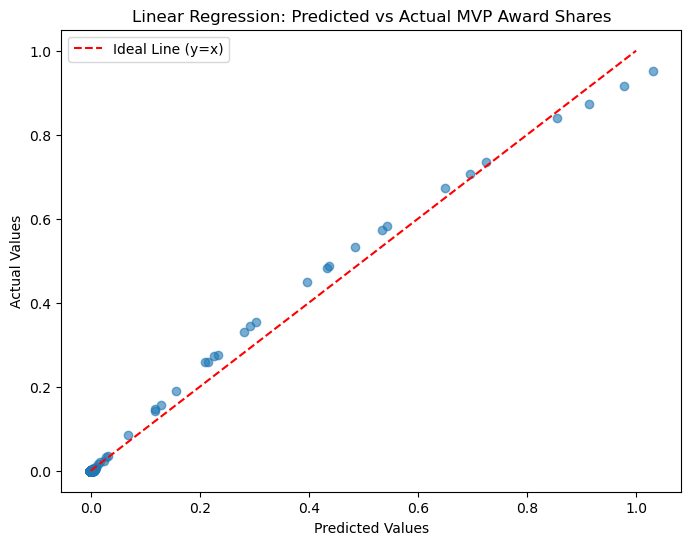

In [8]:
# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_linear, y_test_actual, alpha=0.6)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Ideal Line (y=x)')
plt.title("Linear Regression: Predicted vs Actual MVP Award Shares")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.legend()
plt.show()

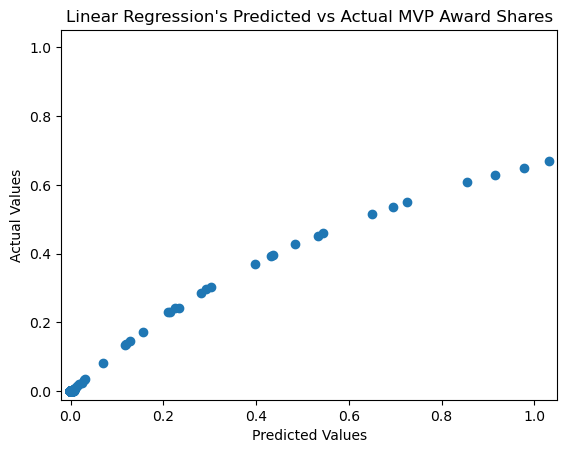

In [4]:
# Plot the predicted vs actual MVP shares
plt.scatter(y_pred_linear, y_test)
plt.xlim([-0.02, 1.05])
plt.ylim([-0.025, 1.05])
plt.title("Linear Regression's Predicted vs Actual MVP Award Shares")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()


In [30]:
x.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_percent', 'x3p', 'x3pa',
       'x3p_percent', 'x2p', 'x2pa', 'x2p_percent', 'e_fg_percent', 'ft',
       'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov',
       'pf', 'pts', 'nba mvp', 'pos_C', 'pos_PF', 'pos_PG', 'pos_SF',
       'pos_SG'],
      dtype='object')